In [0]:
import pandas as pd

In [65]:
!git clone https://github.com/wshuyi/demo-chinese-text-classification-lstm-keras.git

fatal: destination path 'demo-chinese-text-classification-lstm-keras' already exists and is not an empty directory.


In [0]:
from pathlib import Path

In [0]:
mypath = Path("demo-chinese-text-classification-lstm-keras")

In [0]:
df = pd.read_csv(mypath/'dianping.csv')

In [69]:
df.head()

,comment,sentiment
0,口味：不知道是我口高了，还是这家真不怎么样。 我感觉口味确实很一般很一般。上菜相当快，我敢说...,0
1,菜品丰富质量好，服务也不错！很喜欢！,1
2,说真的，不晓得有人排队的理由，香精香精香精香精，拜拜！,0
3,菜量实惠，上菜还算比较快，疙瘩汤喝出了秋日的暖意，烧茄子吃出了大阪烧的味道，想吃土豆片也是口...,1
4,先说我算是娜娜家风荷园开业就一直在这里吃 每次出去回来总想吃一回 有时觉得外面的西式简餐总是...,1


In [70]:
!pip install jieba

In [0]:
import jieba

In [0]:
df['text'] = df.comment.apply(lambda x: " ".join(jieba.cut(x)))

In [73]:
df.head()

,comment,sentiment,text
0,口味：不知道是我口高了，还是这家真不怎么样。 我感觉口味确实很一般很一般。上菜相当快，我敢说...,0,口味 ： 不 知道 是 我口 高 了 ， 还是 这家 真 不怎么样 。 我 感觉 口味 ...
1,菜品丰富质量好，服务也不错！很喜欢！,1,菜品 丰富 质量 好 ， 服务 也 不错 ！ 很 喜欢 ！
2,说真的，不晓得有人排队的理由，香精香精香精香精，拜拜！,0,说真的 ， 不 晓得 有人 排队 的 理由 ， 香精 香精 香精 香精 ， 拜拜 ！
3,菜量实惠，上菜还算比较快，疙瘩汤喝出了秋日的暖意，烧茄子吃出了大阪烧的味道，想吃土豆片也是口...,1,菜量 实惠 ， 上菜 还 算 比较 快 ， 疙瘩汤 喝出 了 秋日 的 暖意 ， 烧茄子 吃...
4,先说我算是娜娜家风荷园开业就一直在这里吃 每次出去回来总想吃一回 有时觉得外面的西式简餐总是...,1,先说 我 算是 娜娜 家风 荷园 开业 就 一直 在 这里 吃 每次 出去 回来 总想 ...


In [0]:
df = df[['text', 'sentiment']]

In [75]:
df.head()

,text,sentiment
0,口味 ： 不 知道 是 我口 高 了 ， 还是 这家 真 不怎么样 。 我 感觉 口味 ...,0
1,菜品 丰富 质量 好 ， 服务 也 不错 ！ 很 喜欢 ！,1
2,说真的 ， 不 晓得 有人 排队 的 理由 ， 香精 香精 香精 香精 ， 拜拜 ！,0
3,菜量 实惠 ， 上菜 还 算 比较 快 ， 疙瘩汤 喝出 了 秋日 的 暖意 ， 烧茄子 吃...,1
4,先说 我 算是 娜娜 家风 荷园 开业 就 一直 在 这里 吃 每次 出去 回来 总想 ...,1


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
import numpy as np

In [0]:
maxlen = 100
max_words = 10000

In [0]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df.text)
sequences = tokenizer.texts_to_sequences(df.text)

In [79]:
type(sequences)

list

In [80]:
sequences[:1]

[[51,
  193,
  12,
  75,
  7,
  4465,
  201,
  3,
  1,
  43,
  104,
  295,
  589,
  4,
  5,
  16,
  50,
  51,
  370,
  9,
  37,
  9,
  37,
  4,
  81,
  567,
  241,
  1,
  4466,
  23,
  20,
  11,
  7,
  251,
  970,
  2,
  4,
  728,
  11,
  12,
  467,
  4,
  44,
  193,
  490,
  105,
  862,
  1,
  3151,
  3151,
  2,
  1,
  74,
  691,
  4467,
  4,
  1798,
  1417,
  4,
  4,
  4,
  41,
  193,
  2071,
  371,
  389,
  370,
  17,
  1,
  46,
  1178,
  255,
  1,
  1799,
  4,
  45,
  193,
  37,
  39,
  4,
  2468,
  19,
  1,
  46,
  10,
  2469,
  4,
  127,
  193,
  37,
  1,
  211,
  127,
  1,
  11,
  128,
  590,
  4,
  25,
  193,
  905,
  3,
  1,
  48,
  9,
  1179,
  4,
  117,
  12,
  48,
  521,
  1281,
  281,
  2072,
  468,
  18,
  863,
  269,
  1,
  48,
  14,
  405,
  3,
  4,
  4468,
  193,
  1561,
  4469,
  6,
  3152,
  16,
  1028,
  49,
  1029,
  207,
  24,
  1800,
  5,
  567,
  12,
  4470,
  1,
  38,
  66,
  157,
  2470,
  538,
  4471,
  864,
  4]]

In [81]:
for sequence in sequences[:5]:
  print(len(sequence))

150
12
16
57
253


In [0]:
data = pad_sequences(sequences, maxlen=maxlen)

In [83]:
data

array([[   2,    1,   74, ..., 4471,  864,    4],
       [   0,    0,    0, ...,    9,   52,    6],
       [   0,    0,    0, ...,    1, 3154,    6],
       ...,
       [   0,    0,    0, ..., 2840,    1, 2240],
       [   0,    0,    0, ...,   19,   44,  196],
       [   0,    0,    0, ...,  533,   42,    6]], dtype=int32)

In [0]:
word_index = tokenizer.word_index

In [85]:
type(word_index)

dict

In [86]:
print(word_index)

{'，': 1, '的': 2, '了': 3, '。': 4, '\xa0': 5, '！': 6, '是': 7, '吃': 8, '很': 9, '也': 10, '都': 11, '不': 12, '味道': 13, '就': 14, '还': 15, '我': 16, '不错': 17, '去': 18, '好': 19, '菜': 20, '没有': 21, '好吃': 22, '说': 23, '有': 24, '人': 25, '就是': 26, '点': 27, '服务员': 28, '可以': 29, '和': 30, '没': 31, '…': 32, '我们': 33, '等': 34, '来': 35, '多': 36, '一般': 37, '在': 38, '吧': 39, '上': 40, '环境': 41, '一个': 42, '还是': 43, '菜品': 44, '服务': 45, '但是': 46, '给': 47, '排队': 48, '到': 49, '感觉': 50, '口味': 51, '喜欢': 52, '？': 53, '真的': 54, '太': 55, '再': 56, '挺': 57, '什么': 58, '啊': 59, '要': 60, '特别': 61, '大': 62, '推荐': 63, '比较': 64, '不是': 65, '这': 66, '不会': 67, '有点': 68, '觉得': 69, '很多': 70, '～': 71, '你': 72, '号': 73, '还有': 74, '知道': 75, '店': 76, '、': 77, '才': 78, '又': 79, '这个': 80, '上菜': 81, '小': 82, '小时': 83, '这么': 84, '非常': 85, '做': 86, '里面': 87, '家': 88, '着': 89, '个': 90, '肉': 91, '时候': 92, '而且': 93, '东西': 94, '过': 95, '但': 96, '朋友': 97, '会': 98, '那么': 99, '让': 100, '不过': 101, '拿': 102, '点评': 103, '这家': 104, '汤': 105, '排骨': 10

In [0]:
labels = np.array(df.sentiment)

In [88]:
labels

array([0, 1, 0, ..., 0, 1, 1])

In [0]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [90]:
labels

array([1, 1, 1, ..., 0, 0, 1])

In [0]:
training_samples = int(len(indices) * .8)
validation_samples = len(indices) - training_samples

In [92]:
training_samples

1600

In [93]:
validation_samples

400

In [0]:
X_train = data[:training_samples]
y_train = labels[:training_samples]
X_valid = data[training_samples: training_samples + validation_samples]
y_valid = labels[training_samples: training_samples + validation_samples]

In [95]:
X_train

array([[   0,    0,    0, ...,    4,   15,   17],
       [   0,    0,    0, ..., 5689, 5690,    3],
       [   0,    0,    0, ...,  164, 5893, 1020],
       ...,
       [   0,    0,    0, ...,   22,   12,  204],
       [   0,    0,    0, ...,    5,  127, 1448],
       [   0,    0,    0, ...,    4,    4,    4]], dtype=int32)

In [96]:
!pip install gensim

In [0]:
from gensim.models import KeyedVectors

In [0]:
myzip = mypath / 'zh.zip'

In [99]:
!unzip $myzip

Archive:  demo-chinese-text-classification-lstm-keras/zh.zip
replace zh.vec? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [100]:
zh_model = KeyedVectors.load_word2vec_format('zh.vec')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [101]:
zh_model.vectors[0]

array([ 8.6988e-02,  9.1123e-02,  3.0722e-02,  3.4160e-03,  2.7568e-02,
        5.4995e-03,  1.0905e-01,  4.9999e-02, -1.9161e-01,  4.2729e-02,
        1.3284e-01, -4.2997e-02,  4.4196e-02, -4.6042e-02,  5.2395e-02,
       -1.3002e-01,  1.1440e-01, -1.5359e-01,  5.7565e-02,  1.3344e-01,
       -6.4197e-02,  5.3679e-02,  1.3349e-01,  6.1268e-02, -2.4911e-03,
        1.9382e-01,  4.4253e-02, -2.0858e-02, -8.0714e-02,  1.0053e-01,
        5.8553e-02,  6.3155e-02, -2.9961e-02, -3.1906e-02,  5.6153e-02,
        5.1014e-02,  1.0752e-01, -7.4407e-02,  9.1990e-02,  1.7744e-01,
       -5.9959e-02,  1.4046e-01, -8.0201e-02,  4.3989e-02, -9.5205e-02,
        1.3022e-02,  9.1900e-02,  2.4317e-02, -7.0992e-02, -1.5179e-01,
       -3.0031e-02,  1.0344e-01, -5.8155e-02,  3.5950e-02, -5.5085e-02,
        4.7587e-02, -1.4251e-01, -1.3986e-01, -1.3891e-01,  6.9042e-03,
        9.0945e-02, -5.5156e-02,  6.8180e-02,  1.1948e-01,  7.8577e-03,
        1.0014e-01, -4.2805e-02,  2.2362e-01, -2.6212e-02, -3.53

In [102]:
list(iter(zh_model.vocab))[:5]

['的', '</s>', '在', '是', '年']

In [103]:
len(zh_model[next(iter(zh_model.vocab))])

300

In [0]:
embedding_dim = len(zh_model[next(iter(zh_model.vocab))])

In [0]:
embedding_matrix = np.random.rand(max_words, embedding_dim)

In [106]:
embedding_matrix

array([[0.88462086, 0.13911182, 0.77820543, ..., 0.58364895, 0.41958903,
        0.52543765],
       [0.07353649, 0.68706519, 0.09028576, ..., 0.35551685, 0.6840772 ,
        0.02154389],
       [0.72200269, 0.24339975, 0.98213908, ..., 0.43813839, 0.12672225,
        0.10858614],
       ...,
       [0.6952957 , 0.97074669, 0.01780983, ..., 0.66651589, 0.32072162,
        0.15051619],
       [0.97500375, 0.58944897, 0.85074586, ..., 0.78758146, 0.74163581,
        0.42076432],
       [0.4160074 , 0.59617725, 0.02143566, ..., 0.05471508, 0.54940463,
        0.30347506]])

In [0]:
embedding_matrix = (embedding_matrix - 0.5) * 2

In [108]:
embedding_matrix

array([[ 0.76924171, -0.72177636,  0.55641086, ...,  0.1672979 ,
        -0.16082194,  0.05087531],
       [-0.85292701,  0.37413038, -0.81942848, ..., -0.28896629,
         0.3681544 , -0.95691222],
       [ 0.44400538, -0.51320051,  0.96427816, ..., -0.12372322,
        -0.7465555 , -0.78282771],
       ...,
       [ 0.39059141,  0.94149337, -0.96438033, ...,  0.33303177,
        -0.35855676, -0.69896763],
       [ 0.9500075 ,  0.17889794,  0.70149173, ...,  0.57516292,
         0.48327162, -0.15847136],
       [-0.16798519,  0.19235449, -0.95712868, ..., -0.89056984,
         0.09880926, -0.39304988]])

In [109]:
zh_model.get_vector('的')

array([ 8.6988e-02,  9.1123e-02,  3.0722e-02,  3.4160e-03,  2.7568e-02,
        5.4995e-03,  1.0905e-01,  4.9999e-02, -1.9161e-01,  4.2729e-02,
        1.3284e-01, -4.2997e-02,  4.4196e-02, -4.6042e-02,  5.2395e-02,
       -1.3002e-01,  1.1440e-01, -1.5359e-01,  5.7565e-02,  1.3344e-01,
       -6.4197e-02,  5.3679e-02,  1.3349e-01,  6.1268e-02, -2.4911e-03,
        1.9382e-01,  4.4253e-02, -2.0858e-02, -8.0714e-02,  1.0053e-01,
        5.8553e-02,  6.3155e-02, -2.9961e-02, -3.1906e-02,  5.6153e-02,
        5.1014e-02,  1.0752e-01, -7.4407e-02,  9.1990e-02,  1.7744e-01,
       -5.9959e-02,  1.4046e-01, -8.0201e-02,  4.3989e-02, -9.5205e-02,
        1.3022e-02,  9.1900e-02,  2.4317e-02, -7.0992e-02, -1.5179e-01,
       -3.0031e-02,  1.0344e-01, -5.8155e-02,  3.5950e-02, -5.5085e-02,
        4.7587e-02, -1.4251e-01, -1.3986e-01, -1.3891e-01,  6.9042e-03,
        9.0945e-02, -5.5156e-02,  6.8180e-02,  1.1948e-01,  7.8577e-03,
        1.0014e-01, -4.2805e-02,  2.2362e-01, -2.6212e-02, -3.53

In [0]:
for word, i in word_index.items():
    if i < max_words:
        try:
          embedding_vector = zh_model.get_vector(word)
          embedding_matrix[i] = embedding_vector
        except:
          pass
            

In [111]:
embedding_matrix

array([[ 0.76924171, -0.72177636,  0.55641086, ...,  0.1672979 ,
        -0.16082194,  0.05087531],
       [-0.85292701,  0.37413038, -0.81942848, ..., -0.28896629,
         0.3681544 , -0.95691222],
       [ 0.086988  ,  0.091123  ,  0.030722  , ...,  0.1095    ,
        -0.053695  ,  0.033823  ],
       ...,
       [ 0.39059141,  0.94149337, -0.96438033, ...,  0.33303177,
        -0.35855676, -0.69896763],
       [ 0.9500075 ,  0.17889794,  0.70149173, ...,  0.57516292,
         0.48327162, -0.15847136],
       [-0.16798519,  0.19235449, -0.95712868, ..., -0.89056984,
         0.09880926, -0.39304988]])

In [112]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(max_words, embedding_dim))

# 隐藏层32
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
# 隐藏层32
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 300)         3000000   
_________________________________________________________________
dense_4 (Dense)              (None, None, 32)          9632      
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
dense_5 (Dense)              (None, None, 32)          1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_____

In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [114]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
model.save("mymodel.h5")

Train on 1600 samples, validate on 400 samples
Epoch 1/20
1600/1600 [==============================] - 6s 4ms/step - loss: 0.6622 - acc: 0.5994 - val_loss: 0.6017 - val_acc: 0.6600
Epoch 2/20
1600/1600 [==============================] - 4s 3ms/step - loss: 0.5803 - acc: 0.7019 - val_loss: 0.5278 - val_acc: 0.7250
Epoch 3/20
1600/1600 [==============================] - 4s 3ms/step - loss: 0.5112 - acc: 0.7556 - val_loss: 0.4690 - val_acc: 0.7725
Epoch 4/20
1600/1600 [==============================] - 5s 3ms/step - loss: 0.4860 - acc: 0.7712 - val_loss: 0.4555 - val_acc: 0.7925
Epoch 5/20
1600/1600 [==============================] - 5s 3ms/step - loss: 0.4599 - acc: 0.7844 - val_loss: 0.4772 - val_acc: 0.7800
Epoch 6/20
1600/1600 [==============================] - 5s 3ms/step - loss: 0.4236 - acc: 0.8063 - val_loss: 0.4013 - val_acc: 0.8250
Epoch 7/20
1600/1600 [==============================] - 5s 3ms/step - loss: 0.4041 - acc: 0.8237 - val_loss: 0.3836 - val_acc: 0.8375
Epoch 8/20
1600

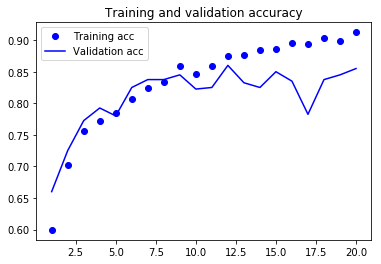

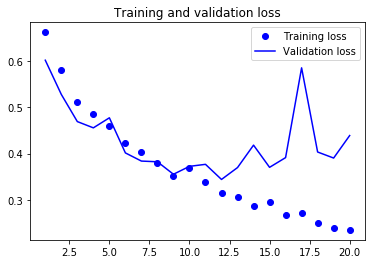

In [115]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()